# Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#------------------------------

import matplotlib.pyplot as plt

myparams = {
    # 'text.usetex': True,
    # 'text.latex.preamble': '\\usepackage{amsfonts}',
    # 'text.latex.preamble': '\\usepackage[utf8]{inputenc}',
    # 'text.latex.preamble': '\\usepackage[russian]{babel}',
    # 'font.family': 'Djvu Serif',
    'font.size': 14,
    'axes.grid': False,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

#------------------------------

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data analysis

In [31]:
path = os.path.join(os.path.dirname(os.getcwd()), 'src', 'ds003688-download', 'participants.tsv')
participants = pd.read_csv(path, sep='\t')
participants[participants['fMRI'] == 'yes']

,participant_id,sex,age,handedness,language_dominance,language_dominance_technique,iEEG,fMRI,iEEG_hemisphere,high_density_grid
3,sub-04,M,11,R,possibly L,fMRI,no,yes,NaN,NaN
6,sub-07,F,42,R,L,fMRI,yes,yes,L,no
7,sub-08,M,17,R,L,fTCD + fMRI,no,yes,NaN,NaN
8,sub-09,F,33,R,L,fTCD,yes,yes,L,no
10,sub-11,F,9,NaN,NaN,NaN,no,yes,NaN,NaN
12,sub-13,F,17,L,R,Wada,yes,yes,R,no
13,sub-14,F,18,R,R,Wada,yes,yes,L,yes
14,sub-15,M,14,R,L,fMRI,no,yes,NaN,NaN
15,sub-16,M,17,R,L,Wada,yes,yes,L,no
17,sub-18,F,15,R,L,fMRI,yes,yes,L,no


# Models

In [32]:
# video sequence
from dataloader import FramesLoader
framesloader = FramesLoader()
vector_list = framesloader.get_vector_list(load=True, new=False)
#vector_list_new = framesloader.get_vector_list(load=True, new=True)

# fMRI scans
from dataloader import Sub

# models
from models import LinearModel, LinearDeltaModel

# visualizer
from visualizer import Visualizer

# additional functions
import utils

# 
# occur = utils.get_occur()

In [5]:
# from PIL import Image
# import torch
# import torchvision
# from tqdm import tqdm

# model = torchvision.models.vit_b_16(weights='IMAGENET1K_SWAG_E2E_V1').to("cuda")
# preprocess = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1.transforms().to("cuda")

In [5]:
# from torch.utils.data import Dataset, DataLoader

In [6]:
# class MyDataset(Dataset):
    
#     def __init__(self):
#         self.frame_paths = [os.path.join(os.path.dirname(os.getcwd()), "src", "frames", f"frame_{i}.jpg") for i in range(1, 9751)]
    
#     def __len__(self):
#         return len(self.frame_paths)
    
#     def __getitem__(self, idx):
#         return preprocess(Image.open(self.frame_paths[idx]))

In [7]:
# dataset = MyDataset()

In [17]:
# dataloader = DataLoader(dataset, batch_size=256)

In [18]:
# vectors = []
# for frame_tensors in tqdm(dataloader, total=len(dataloader)):
#     frame_tensors = frame_tensors.to("cuda")
#     with torch.no_grad():
#         output = model(frame_tensors)
#     vectors.append(output)

100%|██████████| 39/39 [01:46<00:00,  2.72s/it]


In [30]:
# vector_list = torch.cat(vectors).cpu().numpy()

In [31]:
# np.save("vector_list", vector_list)

In [13]:
# noise = np.random.choice([0, 1], size=9750*2, p=[0.5, 0.5]).reshape((9750, 2)) #+ np.random.randn(9750, 135)

## Демонстрация работы метода

In [33]:
sub = Sub('07')

In [34]:
lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()

In [6]:
# ResNet
lindelta.MSE_test

9.749368716477118e-05

In [35]:
# ViT
lindelta.MSE_test

6.863286331992948e-05

In [36]:
visualizer = Visualizer(lindelta)

TEST


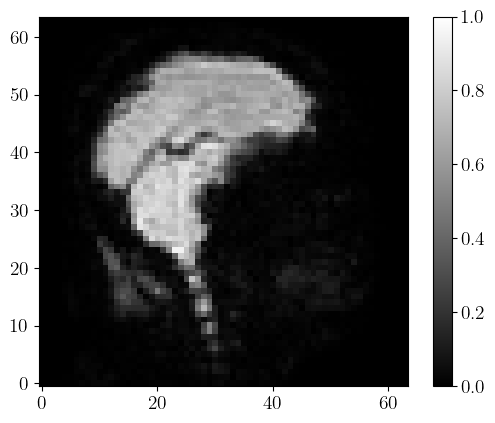

PREDICTED


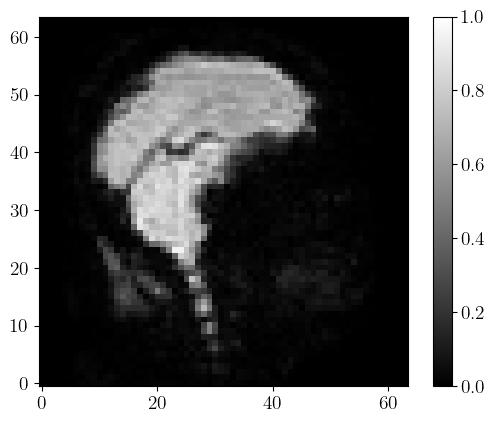

DIFFERENCE


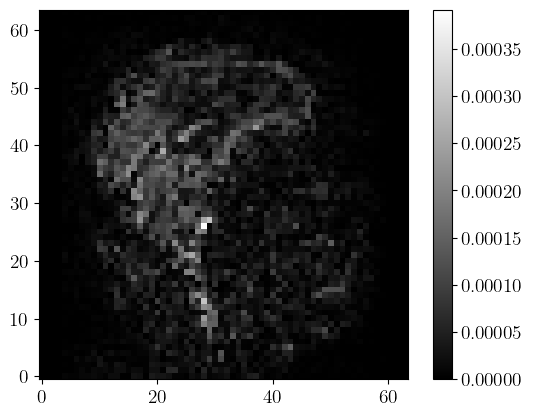

In [8]:
# ResNet
visualizer.show_scan_slices(37, 0, 20)

TEST


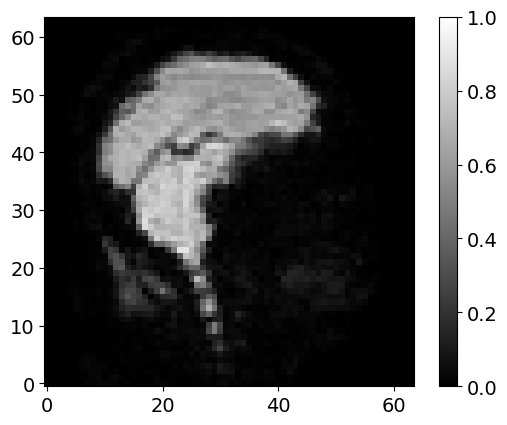

PREDICTED


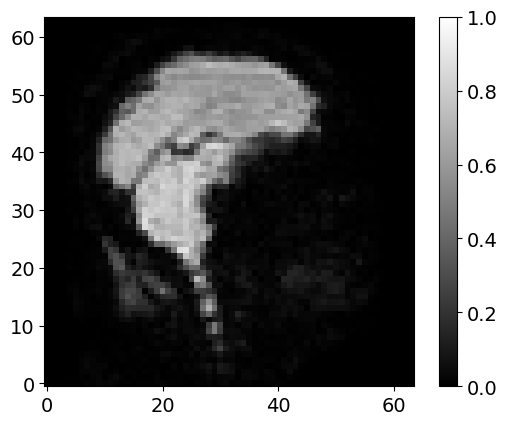

DIFFERENCE


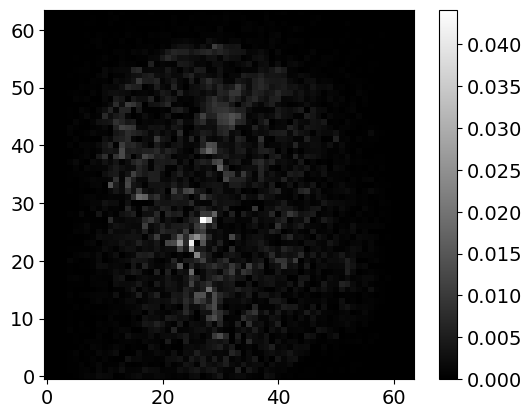

In [37]:
# ViT
visualizer.show_scan_slices(37, 0, 20)

## Анализ времени задержки

In [38]:
sub = Sub('47')
lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
#lindelta = LinearDeltaModel(occur, sub, 5, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()

In [39]:
delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)

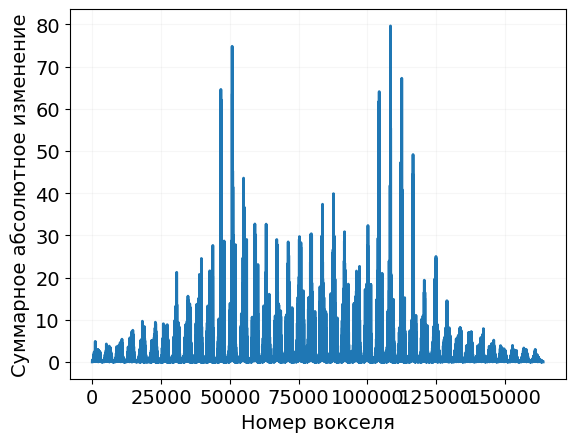

In [40]:
plt.plot(delta_voxels)
plt.xlabel('Номер вокселя')
plt.ylabel('Суммарное абсолютное изменение')
plt.grid(alpha=0.1)
plt.show()

Можно по-разному выбирать границу отсечения:
- 1/2 максимального значения
- конкретное число, например, 10
- такое число, что, например, ровно 1/4 вокселей будет попадать в область (по сути, 0.75-квантиль)

In [41]:
d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
mask1 = np.ones((d1, d2, d3))
mask1.T[:d3//3, :, :] = 0
mask1.T[:, d2//3:, :] = 0
mask1 = mask1.reshape(d1*d2*d3)

In [42]:
#bound = (delta_voxels * mask1).max() / 2
#bound

In [43]:
#bound = 7

In [44]:
array = delta_voxels * mask1
array[array > 0]

array([0.09668116, 0.08224613, 0.0889601 , ..., 0.23442435, 0.20216678,
       0.24867628])

In [45]:
bound = np.quantile(array[array>0], 1 - 1/32)
bound

5.228439002059953

In [46]:
mask = array > bound
difference = lindelta.Y_test_predicted - np.delete(lindelta.Y_test, 0, 1)
MSE_test_corrected = utils.MSE(difference[np.nonzero(mask)])
d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
mask = mask.reshape((d1, d2, d3))

In [14]:
# ResNet
print(f"MSE: {lindelta.MSE_test:.4f}")
print(f"MSE corrected: {MSE_test_corrected:.4f}")

MSE: 0.0001
MSE corrected: 0.0004


In [47]:
# ViT
print(f"MSE: {lindelta.MSE_test:.4f}")
print(f"MSE corrected: {MSE_test_corrected:.4f}")

MSE: 0.0001
MSE corrected: 0.0004


Посмотрим, какие воксели получились самыми изменяющимися

In [48]:
visualizer = Visualizer(lindelta)
mask = mask.reshape((d1, d2, d3))

In [49]:
print(d1, d2, d3)

40 64 64


TEST


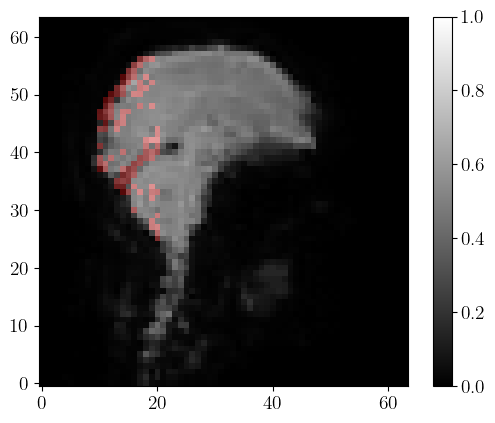

PREDICTED


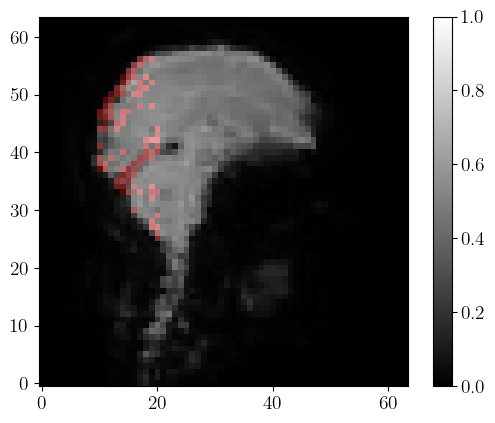

DIFFERENCE


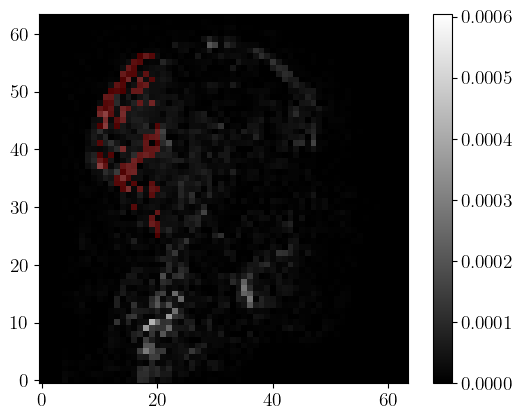

In [17]:
# ResNet
visualizer.show_scan_slices(37, 0, 20, mask)

TEST


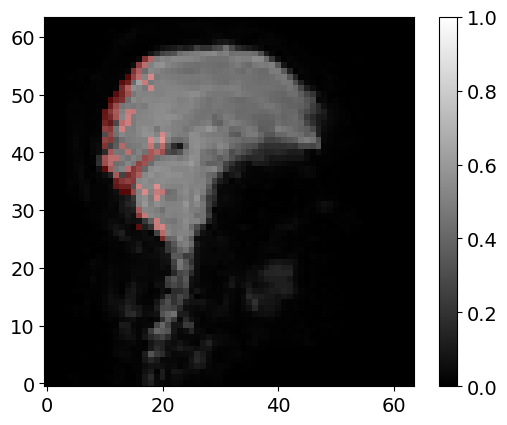

PREDICTED


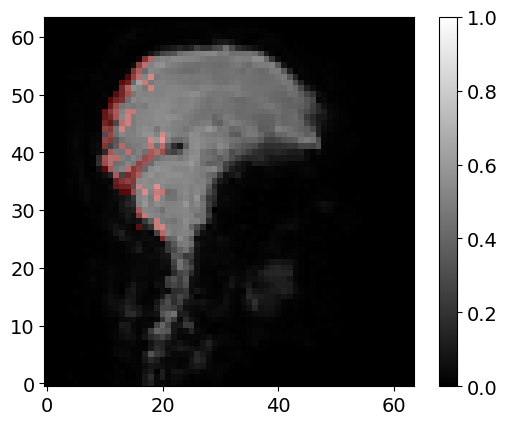

DIFFERENCE


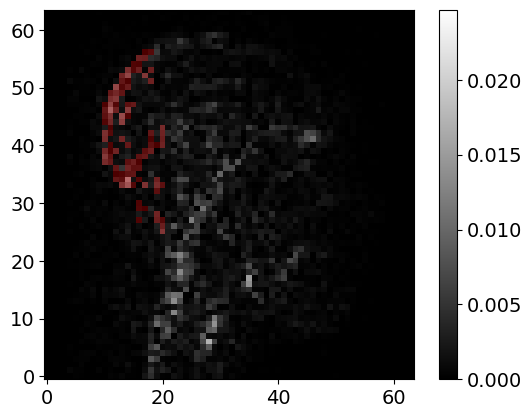

In [50]:
# ViT
visualizer.show_scan_slices(37, 0, 20, mask)

Построим график зависимости ошибки от времени задержки только самых изменяющихся вокселях

In [51]:
# возвращает MSE_test, подсчитанный только на самых изменяющихся вокселях
def evaluate(lindelta: LinearDeltaModel):
    d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
    mask1 = np.ones((d1, d2, d3))
    mask1.T[:d3//3, :, :] = 0
    mask1.T[:, d2//3:, :] = 0
    mask1 = mask1.reshape(d1*d2*d3)
    delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)
    array = delta_voxels * mask1
    #bound = (delta_voxels * mask1).max() / 2
    #bound = (array[array>0]).max() / 4
    bound = np.quantile(array[array>0], 1 - 1/16)
    mask = array > bound
    difference = lindelta.Y_test_predicted - np.delete(lindelta.Y_test, 0, 1)
    MSE_test = utils.MSE(difference[np.nonzero(mask)])
    return MSE_test

In [52]:
print(Sub.subs_with_fmri)

['04', '07', '08', '09', '11', '13', '14', '15', '16', '18', '22', '24', '27', '28', '29', '31', '35', '41', '43', '44', '45', '46', '47', '51', '52', '53', '55', '56', '60', '62']


In [53]:
t = np.linspace(0, 20, 20)

MSE = []
MSE_corrected = []
sub = Sub('47')

for dt in t:
    lindelta = LinearDeltaModel(vector_list, sub, dt, 2, 1000)
    #lindelta = LinearDeltaModel(occur, sub, dt, 4, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))

#### ResNet

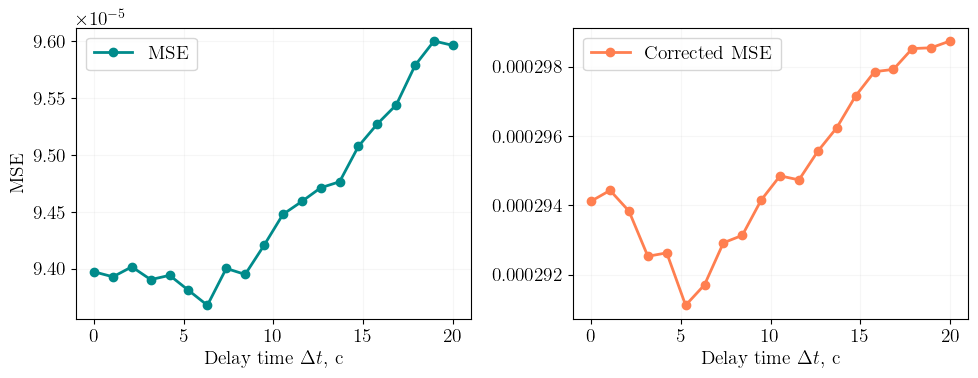

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
#ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_xlabel("Delay time $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
#ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_xlabel("Delay time $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf", bbox_inches="tight")
plt.show()

#### ViT

In [60]:
dict_mse_dt = {"t": t, "MSE_corrected": MSE_corrected, "MSE": MSE}
import pickle
with open('dict_mse_dt.pickle', 'wb') as f:
    pickle.dump(dict_mse_dt, f)

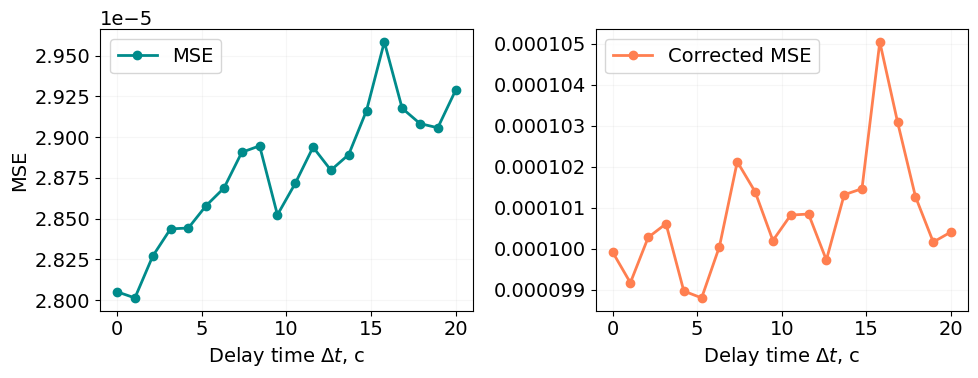

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
#ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_xlabel("Delay time $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
#ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_xlabel("Delay time $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf", bbox_inches="tight")
plt.show()

## Подбор оптимального коэффициента регуляризации

In [31]:
alphas = np.logspace(-3, 8, 12)
MSE_matrix_alpha_8 = []
MSE_matrix_alpha_4 = []
MSE_matrix_alpha_2 = []
MSE_matrix_alpha_1 = []

for number in Sub.subs_with_fmri[:3]:

    MSE_8 = []
    MSE_4 = []
    MSE_2 = []
    MSE_1 = []
    sub = Sub(number)

    for alpha in alphas:

        lindelta = LinearDeltaModel(vector_list, sub, 5, 8, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_8.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 4, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_4.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 2, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_2.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 1, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_1.append(lindelta.MSE_test)

    MSE_matrix_alpha_8.append(MSE_8)
    MSE_matrix_alpha_4.append(MSE_4)
    MSE_matrix_alpha_2.append(MSE_2)
    MSE_matrix_alpha_1.append(MSE_1)

MSE_matrix_alpha_8 = np.array(MSE_matrix_alpha_8)
MSE_matrix_alpha_4 = np.array(MSE_matrix_alpha_4)
MSE_matrix_alpha_2 = np.array(MSE_matrix_alpha_2)
MSE_matrix_alpha_1 = np.array(MSE_matrix_alpha_1)

In [ ]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "MSE_alpha.npy")
array = np.array([MSE_matrix_alpha_8, MSE_matrix_alpha_4, MSE_matrix_alpha_2, MSE_matrix_alpha_1], dtype=object)
np.save(path, array, allow_pickle=True)

In [ ]:
path = os.path.join(os.path.dirname(os.getcwd()), "src", "MSE_alpha.npy")
MSE_matrix_alpha_8, MSE_matrix_alpha_4, MSE_matrix_alpha_2, MSE_matrix_alpha_1 = np.load(path, allow_pickle=True)

#### ResNet

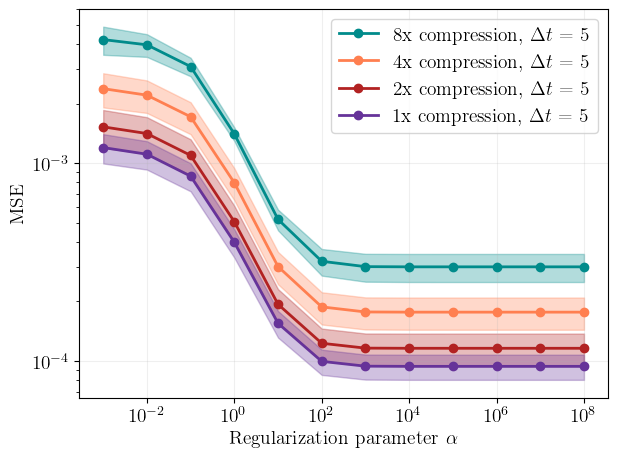

In [23]:
alphas = np.logspace(-3, 8, 12)

MSE_means_alpha_8 = np.array([vector.mean() for vector in MSE_matrix_alpha_8.T])
MSE_stds_alpha_8 = np.array([vector.std() for vector in MSE_matrix_alpha_8.T])

MSE_means_alpha_4 = np.array([vector.mean() for vector in MSE_matrix_alpha_4.T])
MSE_stds_alpha_4 = np.array([vector.std() for vector in MSE_matrix_alpha_4.T])

MSE_means_alpha_2 = np.array([vector.mean() for vector in MSE_matrix_alpha_2.T])
MSE_stds_alpha_2 = np.array([vector.std() for vector in MSE_matrix_alpha_2.T])

MSE_means_alpha_1 = np.array([vector.mean() for vector in MSE_matrix_alpha_1.T])
MSE_stds_alpha_1 = np.array([vector.std() for vector in MSE_matrix_alpha_1.T])

#plt.rcParams.update({'font.size': 12})
#plt.rc("font", family='sans-serif')

plt.plot(alphas, MSE_means_alpha_8, marker='o', color="darkcyan", label=r"8x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_8 - MSE_stds_alpha_8, MSE_means_alpha_8 + MSE_stds_alpha_8, color="darkcyan", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_4, marker='o', color="coral", label=r"4x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_4 - MSE_stds_alpha_4, MSE_means_alpha_4 + MSE_stds_alpha_4, color="coral", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_2, marker='o', color="firebrick", label=r"2x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_2 - MSE_stds_alpha_2, MSE_means_alpha_2 + MSE_stds_alpha_2, color="firebrick", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_1, marker='o', color="rebeccapurple", label=r"1x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_1 - MSE_stds_alpha_1, MSE_means_alpha_1 + MSE_stds_alpha_1, color="rebeccapurple", alpha = 0.3)
#plt.xlabel("Коэффициент регуляризации $\\alpha$")
plt.xlabel("Regularization parameter $\\alpha$")
plt.ylabel("MSE")
#plt.ylim(0.7 * abs(mse_means - mse_stds).max(), 1.1 * abs(mse_means + mse_stds).max())
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig("subs_MSE_alpha.pdf", bbox_inches="tight")
plt.show()

#### ViT

In [ ]:
alphas = np.logspace(-3, 8, 12)

MSE_means_alpha_8 = np.array([vector.mean() for vector in MSE_matrix_alpha_8.T])
MSE_stds_alpha_8 = np.array([vector.std() for vector in MSE_matrix_alpha_8.T])

MSE_means_alpha_4 = np.array([vector.mean() for vector in MSE_matrix_alpha_4.T])
MSE_stds_alpha_4 = np.array([vector.std() for vector in MSE_matrix_alpha_4.T])

MSE_means_alpha_2 = np.array([vector.mean() for vector in MSE_matrix_alpha_2.T])
MSE_stds_alpha_2 = np.array([vector.std() for vector in MSE_matrix_alpha_2.T])

MSE_means_alpha_1 = np.array([vector.mean() for vector in MSE_matrix_alpha_1.T])
MSE_stds_alpha_1 = np.array([vector.std() for vector in MSE_matrix_alpha_1.T])

#plt.rcParams.update({'font.size': 12})
#plt.rc("font", family='sans-serif')

plt.plot(alphas, MSE_means_alpha_8, marker='o', color="darkcyan", label=r"8x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_8 - MSE_stds_alpha_8, MSE_means_alpha_8 + MSE_stds_alpha_8, color="darkcyan", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_4, marker='o', color="coral", label=r"4x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_4 - MSE_stds_alpha_4, MSE_means_alpha_4 + MSE_stds_alpha_4, color="coral", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_2, marker='o', color="firebrick", label=r"2x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_2 - MSE_stds_alpha_2, MSE_means_alpha_2 + MSE_stds_alpha_2, color="firebrick", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_1, marker='o', color="rebeccapurple", label=r"1x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_1 - MSE_stds_alpha_1, MSE_means_alpha_1 + MSE_stds_alpha_1, color="rebeccapurple", alpha = 0.3)
#plt.xlabel("Коэффициент регуляризации $\\alpha$")
plt.xlabel("Regularization parameter $\\alpha$")
plt.ylabel("MSE")
#plt.ylim(0.7 * abs(mse_means - mse_stds).max(), 1.1 * abs(mse_means + mse_stds).max())
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig("subs_MSE_alpha.pdf", bbox_inches="tight")
plt.show()

## Влияние сжатия снимка на время работы метода

In [ ]:
import time

times1 = []
times2 = []
times4 = []
times8 = []

In [ ]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 8, 1000)
    lindelta.fit()
    end_time = time.time()
    times8.append(end_time - start_time)

In [ ]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 4, 1000)
    lindelta.fit()
    end_time = time.time()
    times4.append(end_time - start_time)

In [ ]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 2, 1000)
    lindelta.fit()
    end_time = time.time()
    times2.append(end_time - start_time)

In [ ]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
    lindelta.fit()
    end_time = time.time()
    times1.append(end_time - start_time)

In [ ]:
times1 = np.array(times1)
times2 = np.array(times2)
times4 = np.array(times4)
times8 = np.array(times8)

In [ ]:
times = np.array([times1, times2, times4, times8])

In [ ]:
means = times.mean(axis=1)
stds = times.std(axis=1)

In [ ]:
coeffs = np.array([1, 2, 4, 8])

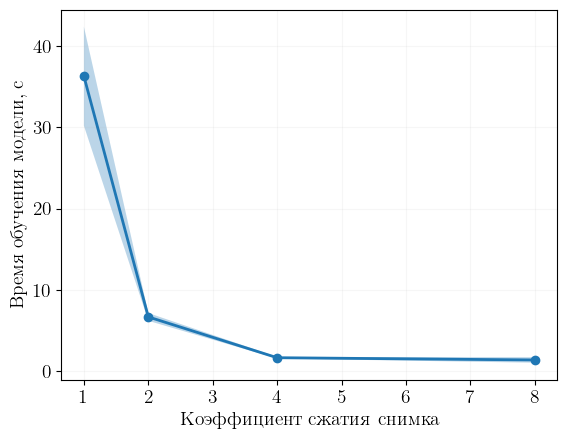

In [ ]:
plt.plot(coeffs, means, marker='o')
plt.fill_between(coeffs, means - stds, means + stds, alpha=0.3)
#plt.xticks(ticks=coeffs)
plt.xlabel("Коэффициент сжатия снимка")
plt.ylabel("Время обучения модели, с")
plt.grid(alpha=0.1)
plt.savefig("time_vs_coef.pdf", bbox_inches="tight")
plt.show()

In [ ]:
print(f"1x compression: mean = {means[0]:.4f}, std = {stds[0]:.4f}")
print(f"2x compression: mean = {means[1]:.4f}, std = {stds[1]:.4f}")
print(f"4x compression: mean = {means[2]:.4f}, std = {stds[2]:.4f}")
print(f"8x compression: mean = {means[3]:.4f}, std = {stds[3]:.4f}")

1x compression: mean = 36.2909, std = 6.0933
2x compression: mean = 6.6679, std = 0.4795
4x compression: mean = 1.6468, std = 0.1012
8x compression: mean = 1.3704, std = 0.3377


## Анализ распределения весов модели

In [24]:
sub = Sub('04')

In [25]:
lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
lindelta.fit()

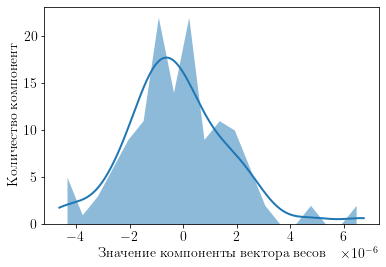

In [26]:
visualizer = Visualizer(lindelta)
visualizer.show_voxel_weight_distribution(1000)

In [26]:
visualizer = Visualizer(lindelta)

c:\Users\kisnikser\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


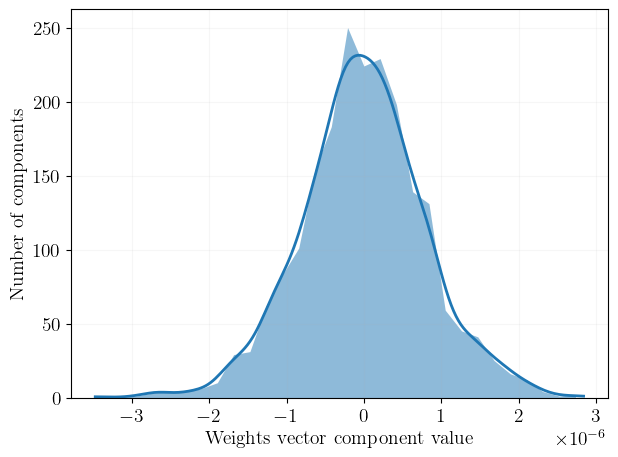

In [27]:
visualizer.show_mean_weight_distribution()
plt.tight_layout()
plt.savefig("distribution.pdf", bbox_inches="tight")
plt.show()

---

Попробуем проверить нормальность распределения с помощью критерия Шапиро-Уилка

In [62]:
from scipy.stats import shapiro
w_mean = np.mean(lindelta.W, axis=0)
pvalue = shapiro(w_mean)[1]

Достигаемый уровень значимости для нулевой гипотезы "Распределение является нормальным"

In [63]:
print(f'pvalue = {pvalue:.2e}')

pvalue = 1.44e-05


Достигаемый уровень значимости позволяет отвергнуть нулевую гипотезу, т.е. распределение нормалньным не является. Тем не менее, оно не равномерное, поэтому построенная модель прогнозирования согласуется с восприятием видеоряда человеком.

## Гипотеза инвариантности весов модели относительно человека

In [15]:
sub4 = Sub('04')
sub7 = Sub('07')

In [16]:
lindelta4 = LinearDeltaModel(vector_list, sub4, 5, 1, 1000)
lindelta7 = LinearDeltaModel(vector_list, sub7, 5, 1, 1000)
mix = LinearDeltaModel(vector_list, sub7, 5, 1, 1000)

In [17]:
lindelta4.fit()
lindelta4.predict()
lindelta4.evaluate()

lindelta7.fit()
lindelta7.predict()
lindelta7.evaluate()

mix.fit()
mix.predict()
mix.evaluate()

In [18]:
Y_test_predicted = mix.repredict(lindelta4.W)
MSE_test = mix.evaluate(Y_test_predicted)
MSE_test

9.749764815004539e-05

In [22]:
print(f"Original MSE_test: {lindelta7.MSE_test:.4e}")
print(f"Mixed MSE_test: {MSE_test:.4e}")
print(f"Difference: {abs(MSE_test - lindelta7.MSE_test):.2e}")

Original MSE_test: 9.7494e-05
Mixed MSE_test: 9.7498e-05
Difference: 3.96e-09


In [ ]:
for num in Sub.subs_with_fmri:
    lindelta = LinearDeltaModel(Sub(num), 5, 1, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    utils.save_object(lindelta.W, f"lindelta-W-{num}.pkl")

In [ ]:
# i строка - берется i-ый испытуемый и к нему подмешиваются остальные (используются их матрицы весов)
# j столбец - берется j-ый испытуемый и подмешивается к остальным (используется его матрица весов)
errors = np.zeros((len(Sub.subs_with_fmri), len(Sub.subs_with_fmri)))

In [ ]:
counter = 0
print(f"The process of filling in the error matrix has started [{counter}/{errors.shape[0] * errors.shape[1]}]\n")

for i in range(errors.shape[0]):
    lindelta = LinearDeltaModel(Sub(Sub.subs_with_fmri[i]), 5, 1, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    for j in range(errors.shape[1]):
        if i == j:
            errors[i][j] = lindelta.MSE_test
        else:
            W = utils.load_object(f"lindeltapred-W-{sub.subs_with_fmri[j]}.pkl")
            errors[i][j] = lindelta.repredict(W)
        counter += 1
        print(f"[{counter}/{errors.shape[0] * errors.shape[1]}]: errors[{i}][{j}] = {errors[i][j]}")

The process of filling in the error matrix has started [0/900]

[1/900]: errors[0][0] = 0.00010887398565506218
[2/900]: errors[0][1] = 0.00010900381651686263
[3/900]: errors[0][2] = 0.00010896205656009976
[4/900]: errors[0][3] = 0.00010901835849875455
[5/900]: errors[0][4] = 0.00010894890100517538
[6/900]: errors[0][5] = 0.00010884914759461071
[7/900]: errors[0][6] = 0.00010928295128708832
[8/900]: errors[0][7] = 0.00010923043515144097
[9/900]: errors[0][8] = 0.00010944451477955181
[10/900]: errors[0][9] = 0.0001088782992252496
[11/900]: errors[0][10] = 0.00010879594172283322
[12/900]: errors[0][11] = 0.00010923751300813255
[13/900]: errors[0][12] = 0.00010896583535174628
[14/900]: errors[0][13] = 0.00010914541056324956
[15/900]: errors[0][14] = 0.00010895207686188552
[16/900]: errors[0][15] = 0.00010923700256943652
[17/900]: errors[0][16] = 0.00010912205813469299
[18/900]: errors[0][17] = 0.00010924940076113565
[19/900]: errors[0][18] = 0.00010929122949549549
[20/900]: errors[0][19] =

In [ ]:
utils.save_object(errors, "errors.pkl")

In [ ]:
errors = utils.load_object("errors.pkl")

In [ ]:
# содержит отличие MSE от диагонального элемента в процентах
errors_scaled = ((errors.T / np.array([errors[i][i] for i in range(errors.shape[0])])).T - np.ones((errors.shape[0], errors.shape[0]))) * 100

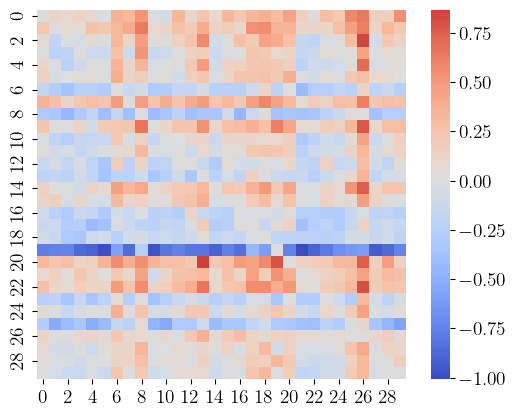

In [ ]:
sns.heatmap(errors_scaled, square=True, center=0, cmap="coolwarm")
plt.savefig("heatmap.pdf", bbox_inches='tight')
plt.show()

## Корректность работы метода

In [4]:
sub35 = Sub('35')

In [5]:
lindelta35 = LinearDeltaModel(vector_list, sub35, 5, 1, 1000)
noised = LinearDeltaModel(vector_list, sub35, 5, 1, 1000)

In [6]:
lindelta35.fit()
lindelta35.predict()
lindelta35.evaluate()

In [7]:
#X_random_train = np.random.rand(lindelta35.X_train.shape[0], lindelta35.X_train.shape[1])
#X_random_test = np.random.rand(lindelta35.X_test.shape[0], lindelta35.X_test.shape[1])
X_random_train = np.ones((lindelta35.X_train.shape[0], lindelta35.X_train.shape[1]))
X_random_test = np.ones((lindelta35.X_test.shape[0], lindelta35.X_test.shape[1]))

In [8]:
noised.deltaY_train_predicted = lindelta35.W @ X_random_train.T
noised.deltaY_test_predicted = lindelta35.W @ X_random_test.T
noised.Y_train_predicted = np.delete(noised.Y_train, -1, 1) + noised.deltaY_train_predicted
noised.Y_test_predicted = np.delete(noised.Y_test, -1, 1) + noised.deltaY_test_predicted
    
noised.MSE_test = noised.evaluate(noised.Y_test_predicted)

In [9]:
lindelta35.MSE_test

0.00015457523719500707

In [10]:
noised.MSE_test

0.00015460446057352414

In [26]:
visualizer35 = Visualizer(lindelta35)
visualizernoised = Visualizer(noised)

TEST


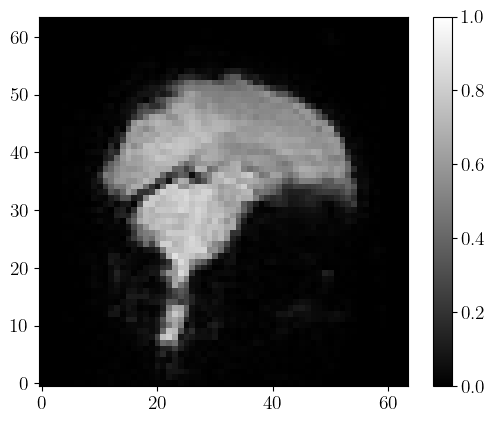

PREDICTED


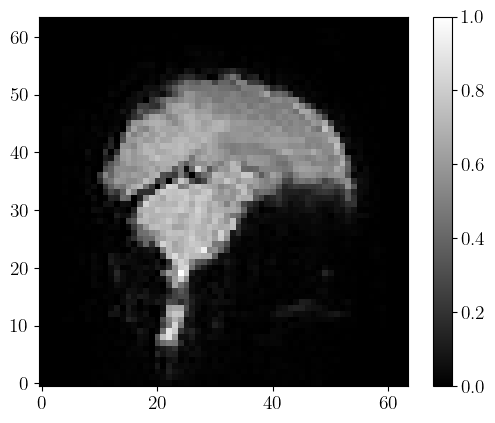

DELTA


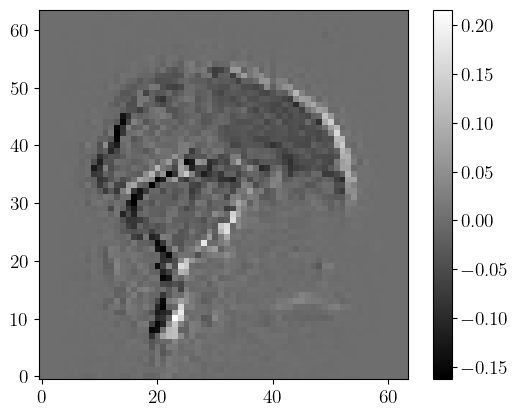

DIFFERENCE


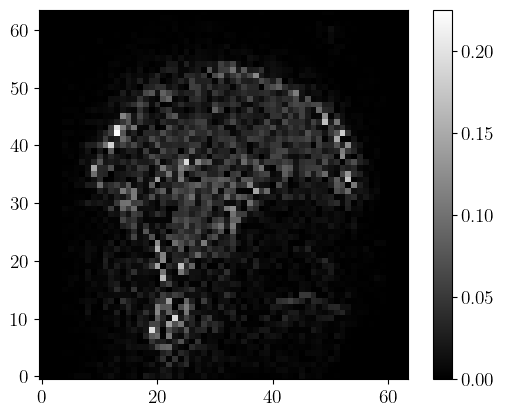

In [29]:
visualizer35.show_recovered_scan_slices(-1, 0, 20)

In [15]:
scan_test = lindelta35.Y_test.T[-1]
scan_predicted = lindelta35.Y_test.T[0] + np.sum(lindelta35.deltaY_test_predicted.T[:-1], axis = 0)

In [16]:
MSE_test = np.linalg.norm(scan_test - scan_predicted) ** 2 / scan_test.shape[0]
MSE_test

0.0004874186244186696

TEST


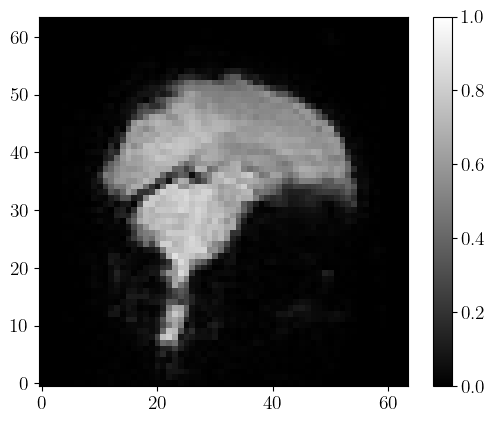

PREDICTED


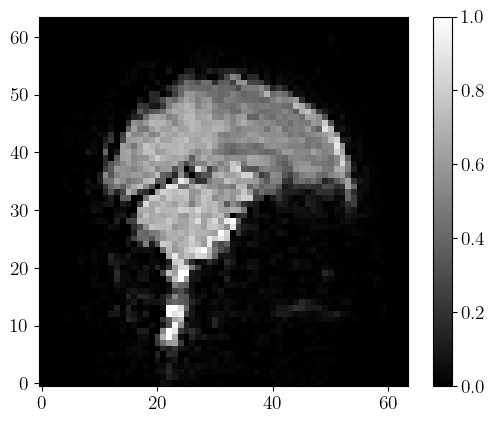

DELTA


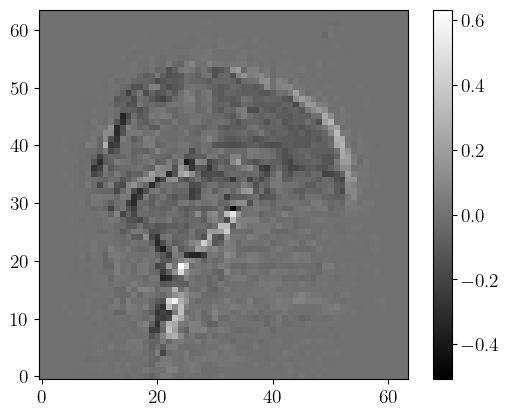

DIFFERENCE


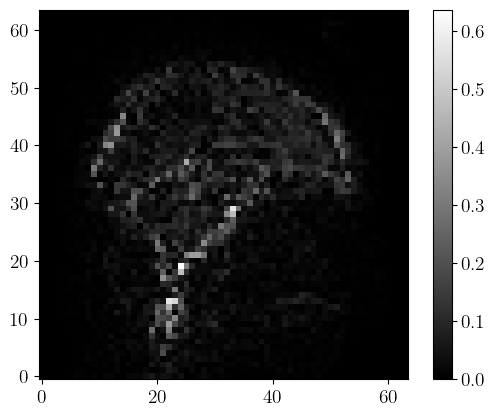

In [30]:
visualizernoised.show_recovered_scan_slices(-1, 0, 20)

In [19]:
scan_test = noised.Y_test.T[-1]
scan_predicted = noised.Y_test.T[0] + np.sum(noised.deltaY_test_predicted.T[:-1], axis = 0)

In [20]:
MSE_test_noised = np.linalg.norm(scan_test - scan_predicted) ** 2 / scan_test.shape[0]
MSE_test_noised

0.0017609501195522026

In [24]:
print(f"{MSE_test:.2e}")
print(f"{MSE_test_noised:.2e}")
print(f"{abs(MSE_test - MSE_test_noised):.2e}")

4.87e-04
1.76e-03
1.27e-03


## Связь снимков фМРТ с появлением объектов в видеоряде

In [668]:
Sub.subs_with_fmri

['04',
 '07',
 '08',
 '09',
 '11',
 '13',
 '14',
 '15',
 '16',
 '18',
 '22',
 '24',
 '27',
 '28',
 '29',
 '31',
 '35',
 '41',
 '43',
 '44',
 '45',
 '46',
 '47',
 '51',
 '52',
 '53',
 '55',
 '56',
 '60',
 '62']

In [669]:
sub = Sub('35')

In [670]:
lindelta = LinearDeltaModel(occur, sub, 5, 8, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()

In [671]:
lindelta.MSE_test

5.55023112010521e-06

In [672]:
visualizer = Visualizer(lindelta)

MaxPool3d

TEST


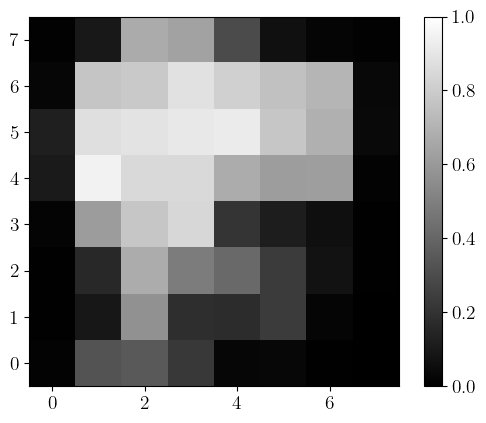

PREDICTED


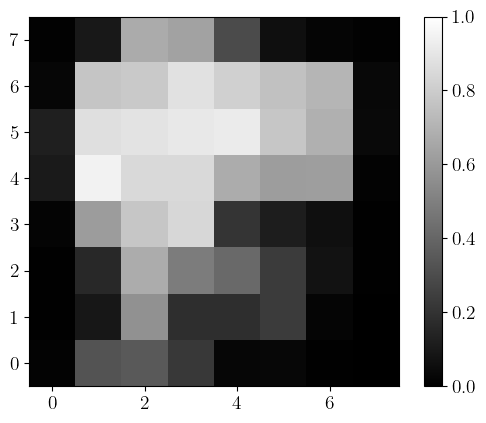

DIFFERENCE


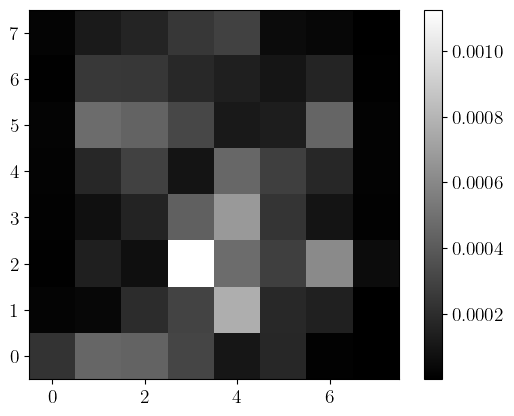

In [560]:
visualizer.show_scan_slices(37, 0, 2)

AvgPool3d

TEST


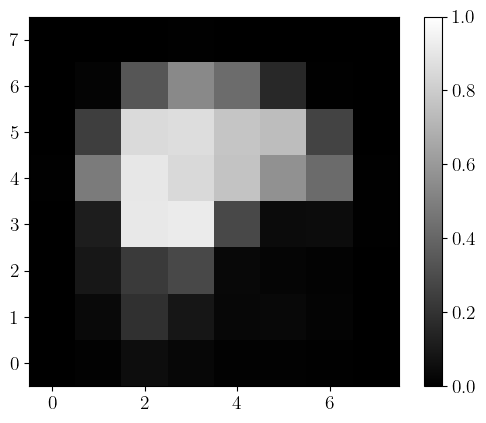

PREDICTED


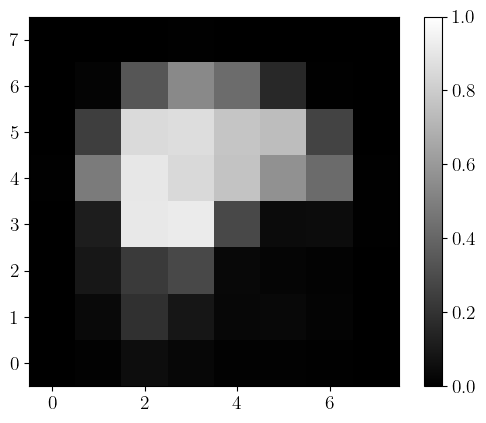

DIFFERENCE


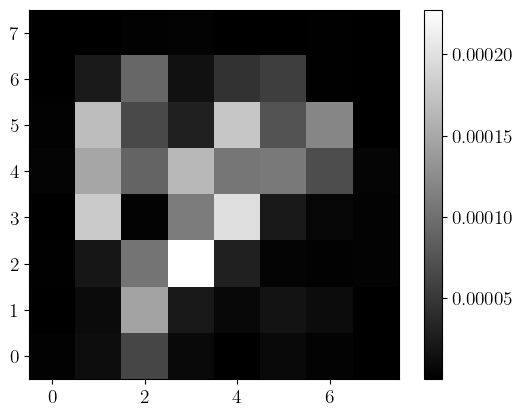

In [673]:
visualizer.show_scan_slices(37, 0, 2)

Исследуем кросс-корреляционную функцию

Первый временной ряд - признаковое описание изображения. Каждое изображение описывается вектором из 0 и 1 размерности 135. Всего есть 9750 наблюдений.
Временной ряд многомерный. Его размерность 135. Таким образом, мы смотрим на эволюцию каждой компоненты признакового описания во времени.

In [566]:
occur[occur == -1] = 0

In [567]:
occur

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0]])

In [568]:
#ts1 = np.vstack((lindelta.X_train, lindelta.X_test)).T
ts1 = occur.T
ts1.shape

(135, 9750)

Сгруппируем изображения так, чтобы каждая группа отвечала одному снимку фМРТ. Частота снимков в 15 раз меньше частоты видеоряда. Так что усредним каждую группу из 15 изображений.

In [569]:
pairs = [(15*k, 15*(k+1)) for k in range(ts1.shape[1]//15)]

In [570]:
means = []

for idx in pairs:
    mean = ts1.T[idx[0]:idx[1]].mean(axis=0)
    means.append(mean)

means = np.array(means)[:633].T

In [571]:
means.shape

(135, 633)

Второй временной ряд - снимки фМРТ. Каждый из них развернут в вектор размерности 40х64х64 = 163840. Всего 633 наблюдения. Временной ряд многомерный. Его размерность 2560. Таким образом, мы смотрим на эволюцию каждого вокселя во времени.

In [674]:
ts2 = np.hstack((lindelta.Y_train, lindelta.Y_test))
ts2.shape

(320, 633)

In [734]:
from matplotlib import colors

def masked(indices=None, scan_number=0, slice_number=4, scans=scans, dims=(5, 8, 8)):
    scan_vector = scans.T[scan_number]
    scan = scan_vector.reshape(dims)
    mask_vector = np.zeros_like(scan_vector)
    mask_vector[indices] = 1
    mask = mask_vector.reshape(dims)
    scan_slice = scan[slice_number, :, :].T
    scan_slice_masked = mask[slice_number, :, :].T
    return scan_slice, scan_slice_masked

def show(indices=None, scan_number=0, slice_number=4, ts=ts2, dims=(5, 8, 8)):
    scan_slice, scan_slice_masked = masked(indices, scan_number, slice_number, ts, dims)
    cmap = colors.ListedColormap(['black', 'red'])
    plt.imshow(scan_slice, cmap="gray", origin="lower", vmin=0, vmax=1)
    plt.imshow(scan_slice_masked, cmap=cmap, origin="lower", alpha=0.3)
    plt.show()

In [574]:
#indices = np.array([203, 204, 205, 267, 268, 269]) # затылочная доля
indices = np.array([172, 173, 174, 236, 237, 238, 300, 301, 302]) # лобная доля

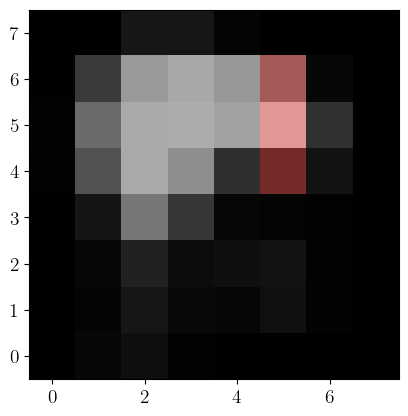

In [575]:
show(indices, slice_number=2)

In [358]:
import statsmodels.api as sm

In [359]:
#trash = np.ones_like(means)
trash = np.random.randn(135, 633)

In [651]:
#object_idx = 99 # pippi
object_idx = 72 # horse

In [707]:
matrix = np.array([sm.tsa.stattools.ccf(ts2[voxel_idx], means[object_idx]) for voxel_idx in range(ts2.shape[0])])

In [708]:
matrix.shape

(320, 633)

Top k=10 voxels with the largest cross-correlations at first 3 time moments

In [709]:
k = 10
np.argsort(matrix[:, :3].mean(axis=1))[-k:][::-1]

array([ 92,  78, 206, 132,  75,  22, 203, 146, 205, 139], dtype=int64)

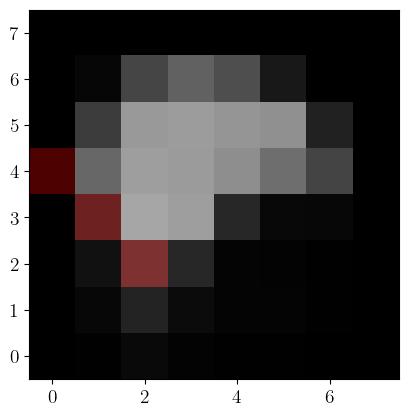

In [710]:
show(indices=np.argsort(matrix[:, :3].mean(axis=1))[-k:][::-1],
     slice_number=2)

In [718]:
import warnings
warnings.filterwarnings("ignore")

In [762]:
def cross_correlation(ts1: np.ndarray, ts2: np.ndarray, k=3) -> float:
    ts1 = ts1 - np.mean(ts1)
    ts2 = ts2 - np.mean(ts2)
    return ts1[k-1:] @ ts2[:-k+1]

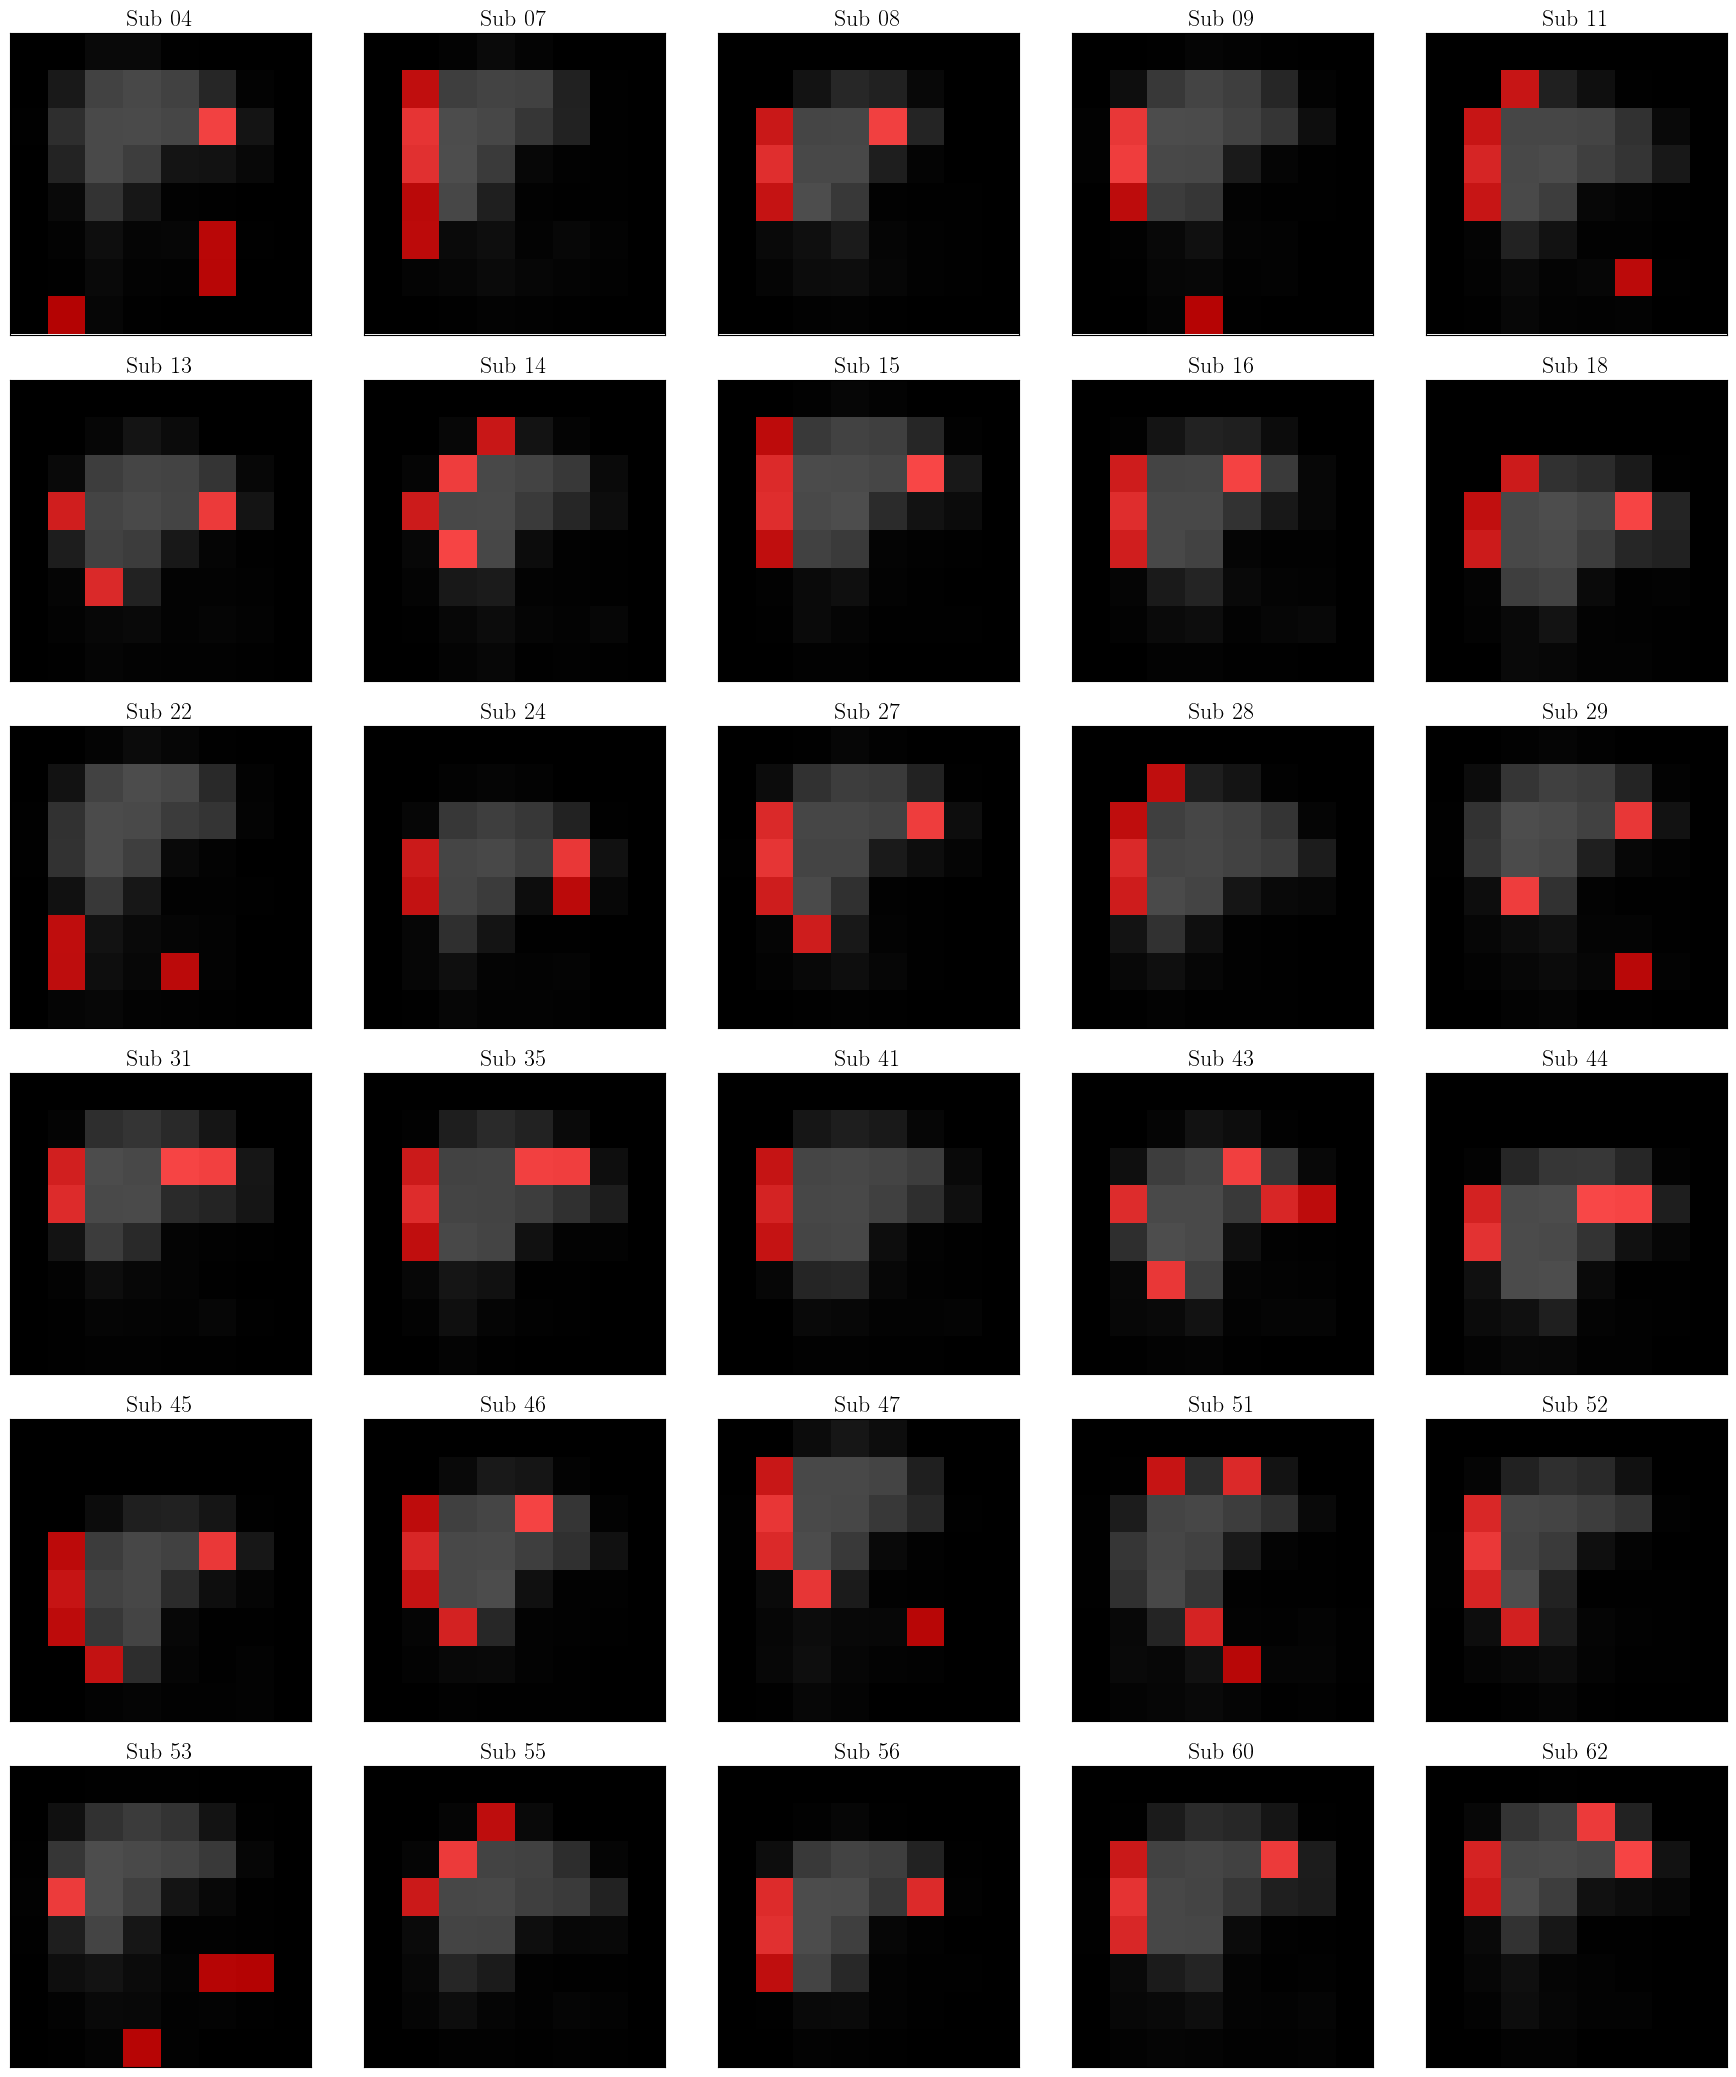

In [775]:
fig, ax = plt.subplots(6, 5, figsize=(18, 21))

cmap = colors.ListedColormap(['black', 'red'])
object_idx = 72 # horse
k = 10
t = 3

for idx, sub_idx in enumerate(Sub.subs_with_fmri):
    sub = Sub(sub_idx)
    lindelta = LinearDeltaModel(occur, sub, 5, 8, 1000)
    scans = np.hstack((lindelta.Y_train, lindelta.Y_test))
    #matrix = np.array([sm.tsa.stattools.ccf(scans[voxel_idx], means[object_idx]) for voxel_idx in range(scans.shape[0])])
    #indices = np.argsort(matrix[:, :t].mean(axis=1))[-k:][::-1]
    vector = np.array([cross_correlation(scans[voxel_idx], means[object_idx], k=3) for voxel_idx in range(scans.shape[0])])
    indices = np.argsort(vector)[-k:][::-1]
    dims = lindelta._d1, lindelta._d2, lindelta._d3
    scan_slice, scan_slice_masked = masked(indices, slice_number=2, scans=scans, dims=dims)
    i = idx // 5
    j = idx % 5
    ax[i, j].imshow(scan_slice, cmap="gray", origin="lower", vmin=0, vmax=1)
    ax[i, j].imshow(scan_slice_masked, cmap=cmap, origin="lower", alpha=0.7)
    ax[i, j].set_title(f"Sub {sub_idx}")

plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()
plt.savefig("cross_correlations.pdf", bbox_inches="tight")
plt.show()

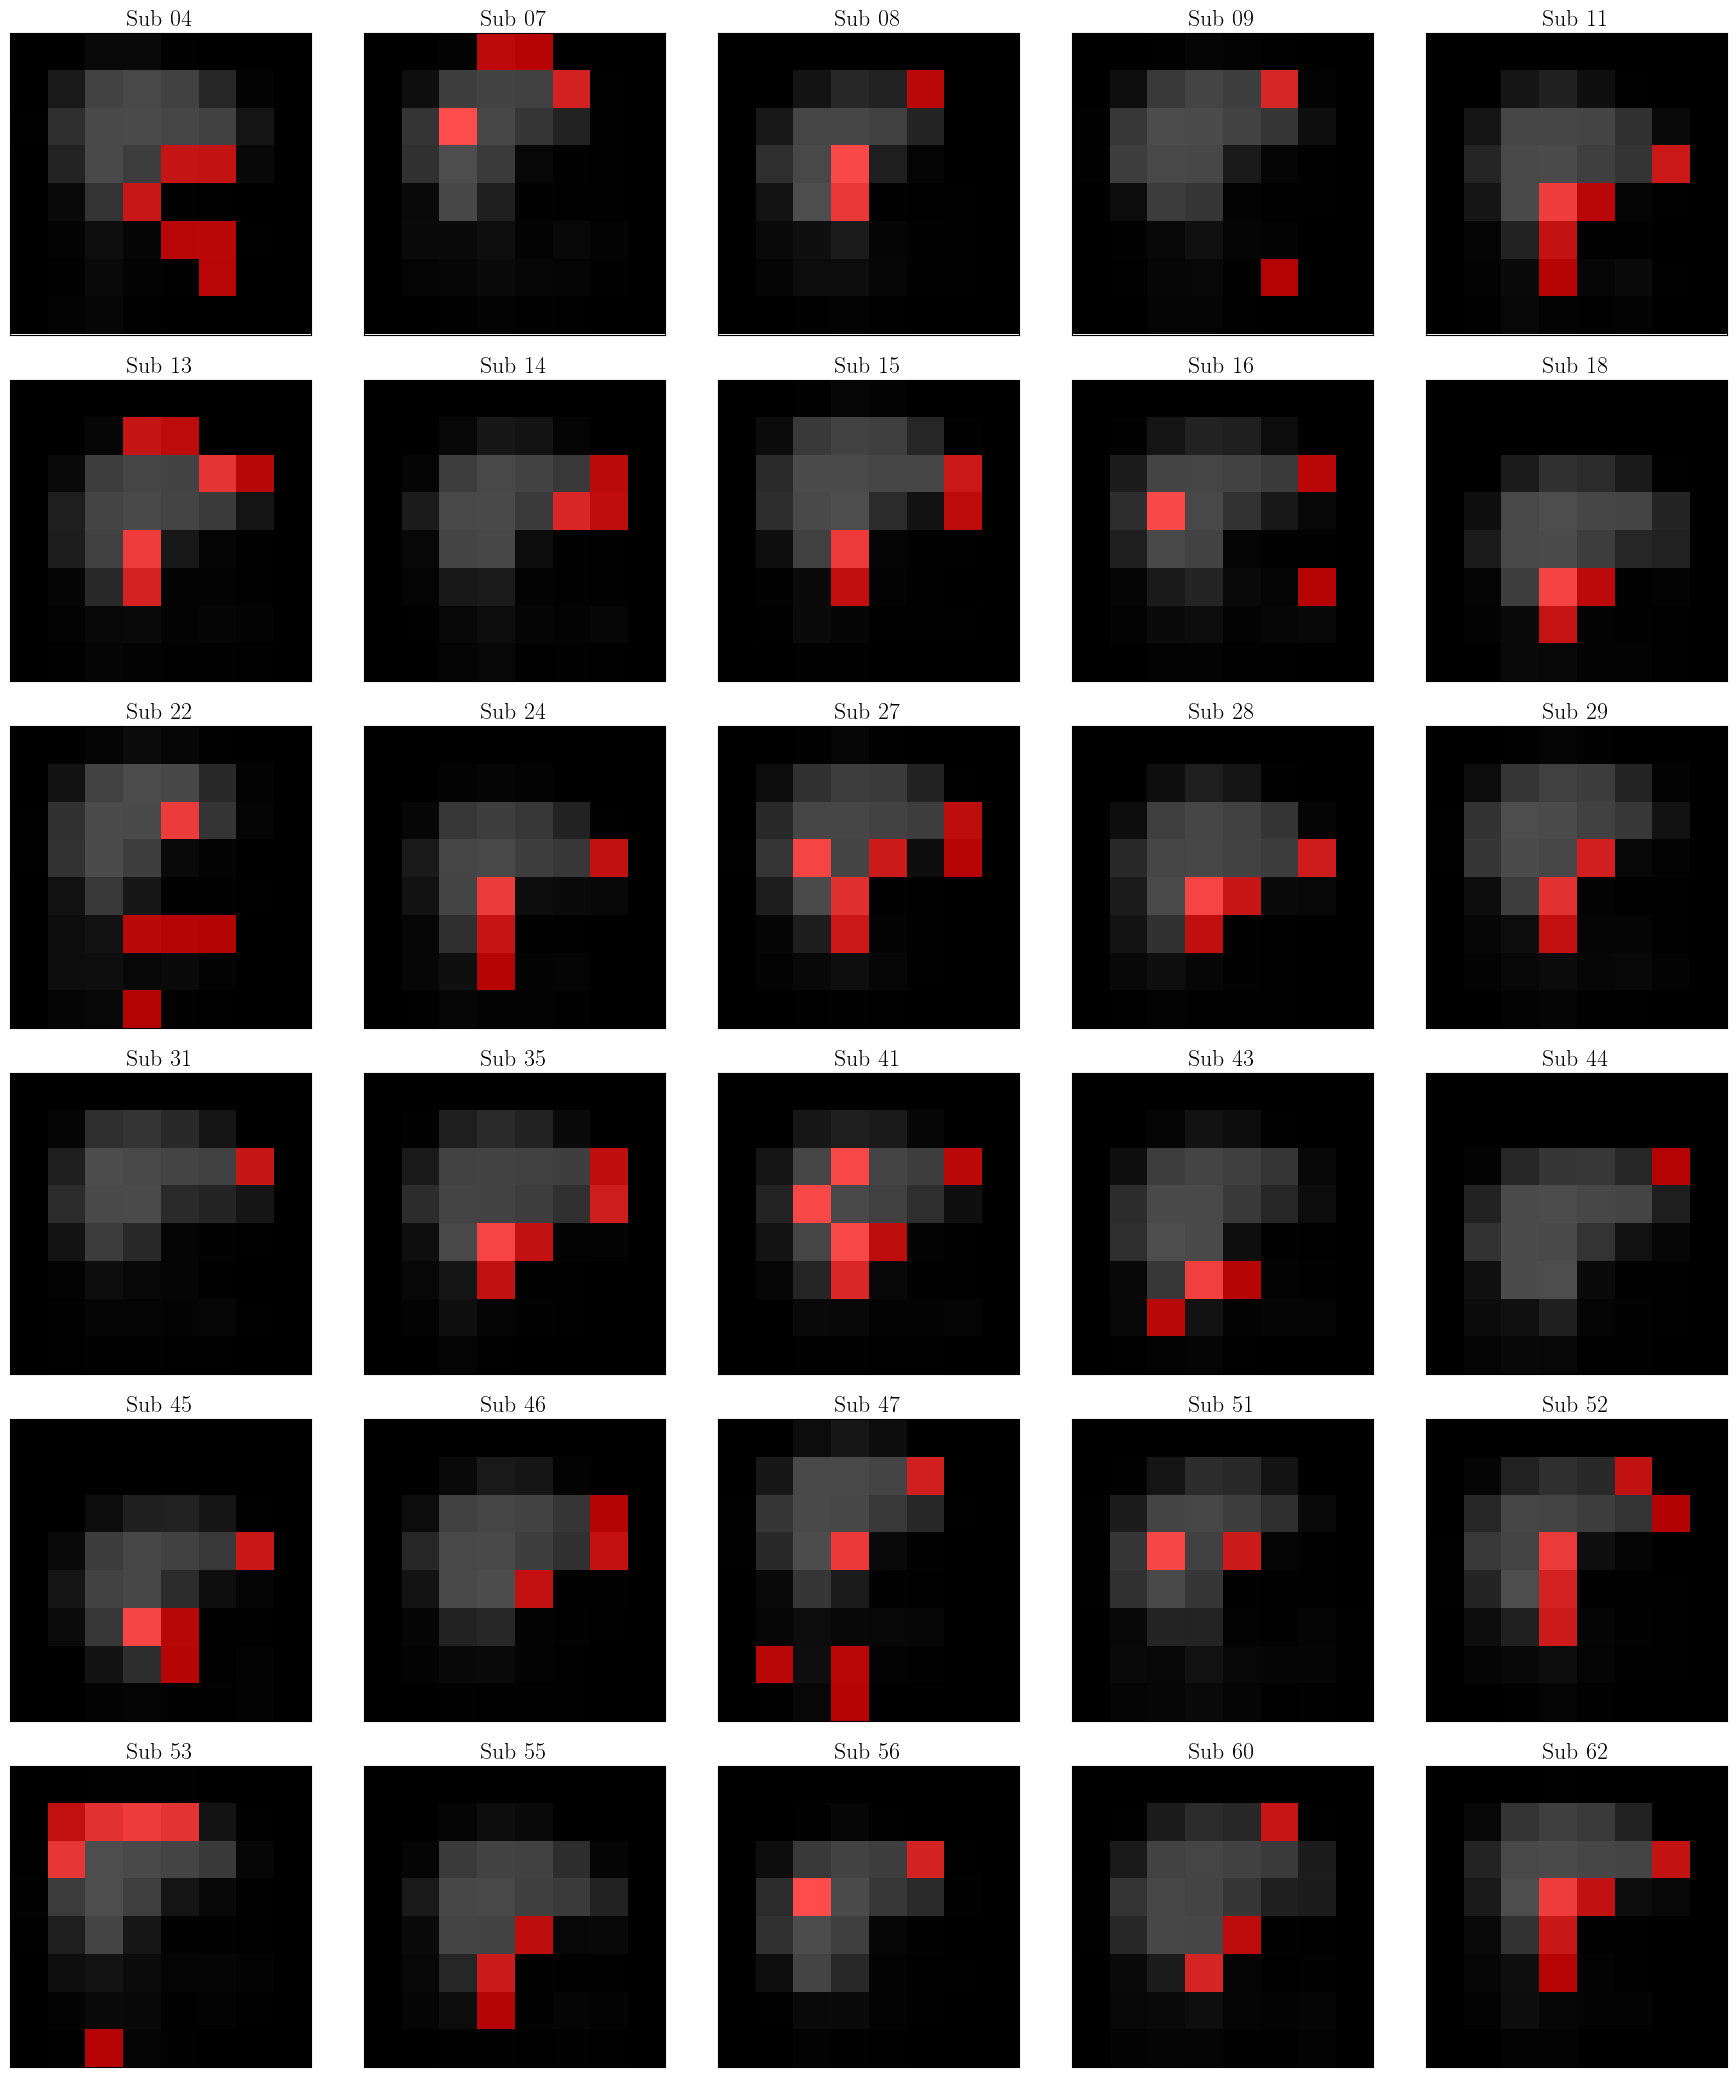

In [776]:
fig, ax = plt.subplots(6, 5, figsize=(18, 21))

cmap = colors.ListedColormap(['black', 'red'])
object_idx = 72 # horse
k = 10
t = 3

for idx, sub_idx in enumerate(Sub.subs_with_fmri):
    sub = Sub(sub_idx)
    lindelta = LinearDeltaModel(occur, sub, 5, 8, 1000)
    scans = np.hstack((lindelta.Y_train, lindelta.Y_test))
    #matrix = np.array([sm.tsa.stattools.ccf(scans[voxel_idx], means[object_idx]) for voxel_idx in range(scans.shape[0])])
    #indices = np.argsort(matrix[:, :t].mean(axis=1))[-k:][::-1]
    vector = np.array([cross_correlation(scans[voxel_idx], trash[object_idx], k=3) for voxel_idx in range(scans.shape[0])])
    indices = np.argsort(vector)[-k:][::-1]
    dims = lindelta._d1, lindelta._d2, lindelta._d3
    scan_slice, scan_slice_masked = masked(indices, slice_number=2, scans=scans, dims=dims)
    i = idx // 5
    j = idx % 5
    ax[i, j].imshow(scan_slice, cmap="gray", origin="lower", vmin=0, vmax=1)
    ax[i, j].imshow(scan_slice_masked, cmap=cmap, origin="lower", alpha=0.7)
    ax[i, j].set_title(f"Sub {sub_idx}")

plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()
plt.savefig("cross_correlations_trash.pdf", bbox_inches="tight")
plt.show()